# Tools

In [29]:
import numpy as np

def nm_to_inv_cm(lambda_nm):
    """
    Convert wavelength from nanometers (nm) to wavenumber (cm⁻¹).

    Formula: 𝜈~tilde~ [cm⁻¹] = 10⁷ / λ[nm]

    Accepts: float | int | array-like
    Returns: numpy.ndarray (or float if you pass a scalar)
    """
    arr = np.asarray(lambda_nm, dtype=float)
    return (1e7 / arr) if arr.ndim else float(1e7 / arr)

# Examples
print(nm_to_inv_cm(910)+25)                 # 18181.818...

11014.010989010989


In [31]:
nm_to_inv_cm(nm_to_inv_cm(900))

900.0

# From source -- Works

## on pop!_os system

Here’s a tight, working path to compile LBLRTM v12.17 on Pop!_OS (Ubuntu-based), using gfortran. I’m following AER’s own docs/repos and keeping it minimal—just what you need.

### System deps (Pop!_OS / Ubuntu)
sudo apt update
sudo apt install -y build-essential gfortran make git \
  libnetcdf-dev libnetcdff-dev netcdf-bin


Notes: LBLRTM ≥ v12.14 needs NetCDF; the Fortran dev pkg (libnetcdff-dev) provides the Fortran interface (and legacy netcdf.inc), while netcdf-bin gives handy tools like ncdump. 
GitHub
+2
Launchpad
+2

### Get the sources at the tagged releases
#### LBLRTM v12.17
git clone --recursive https://github.com/AER-RC/LBLRTM.git
cd LBLRTM
git checkout tags/v12.17
cd ..

#### LNFL v3.2 (needed to make TAPE3)
git clone --recursive https://github.com/AER-RC/LNFL.git
cd LNFL
git checkout tags/v3.2
cd ..


AER recommends cloning with --recursive (submodules) and checking out the tags shown above. 
GitHub
+1

### Download the AER line file (v3.8.1)

You need the ASCII line database for LNFL:

git clone https://github.com/AER-RC/AER_Line_File.git

This repo includes a small Python downloader for the Zenodo archive.
Or download the tarball directly from Zenodo and unpack:
  aer_v_3.8.1.tar.gz  →  an 'aer_v_3.8.1' directory of ASCII files

### Build LNFL

#### try to build (next section below), if it does not work, try the following

Edit LNFL’s GNU targets to add -std=legacy (and, if needed, -fallow-argument-mismatch).
Open LNFL/build/makefile.common and for the GNU single-precision target make it look like this:

linuxGNUsgl:
    ${MAKE} -f ${MAKEFILE} all P_TYPE=sgl FC_TYPE=gnu PLTFRM=linux \
    FC=gfortran \
    FCFLAG="-frecord-marker=4 -std=legacy" \
    UTIL_FILE=util_gfortran.f90

#### Build LNFL (single precision with GNU)
cd LNFL/build
make -f make_lnfl linuxGNUsgl
>resulting lnfl executable will appear in the top-level LNFL dir (or build dir, depending on makefile)

cd ../..

link the compiled binary to lnfl in ~/bin and make sure that ~/bin is in the Path variable

### Configure and build LBLRTM (double precision with GNU)

Edit NetCDF include/lib paths in LBLRTM/build/addlibs.inc. On Pop!_OS the defaults are usually:

Include (NCI): /usr/include

Lib (NCL): /usr/lib/x86_64-linux-gnu

You can confirm with:

nf-config --includedir     # from libnetcdff-dev
nf-config --flibs          # shows link flags and where the libs live


If you see netcdf.inc errors, it’s almost always because NCI/NCL aren’t pointing to the right places—AER’s issue thread calls this out explicitly. 

Now build:

cd LBLRTM/build
make -f make_lblrtm linuxGNUdbl
cd ../..

## Run the example run_example_solar_downwelling_kurucz

### First you need to get the TAPE3 file

> cd /projecte/mfrsr2pwt/run_examples/TAPE3_files

make sure the lnfl executable is in the folder. Linking was not enough

> cp /home/hagen/prog/LNFL/lnfl lnfl_v3.2_linux_pgi_sgl

linke the line file

> ln -sf ~/prog/aer_v_3.8/line_file/aer_v_3.8.1 TAPE1

run the Perl script. Note, if it can't find the executable it might be because Perl is looking in Path but not in the current folder. In the Perl script add an ./ in front of the executable, e.g. "./lnfl" instead of just "lnfl".

> ./run_lnfl.pl

after that there should be a bunch of TAPE3_... files that are non-zero size.

### now run LBLRTM

go to the example folder

> cd ~/projecte/mfrsr2pwt/run_examples/run_example_solar_downwelling_kurucz

Make sure you link the executable to where it actually is. Again, if the Perl script cant find lblrtm add an "./" infront of lblrtm in the Perl script. Then:

> ./script_run_example.pl

## read the Tape12

get RC_utils, lblTools.py and FortranFile.py from  https://github.com/AER-RC/common.git

In [5]:
import RC_utils as RC

In [ ]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/run_examples/run_example_solar_downwelling_kurucz/TAPE13_test')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)


wn.shape, out.shape

plt.plot(nm_to_inv_cm(wn),out)

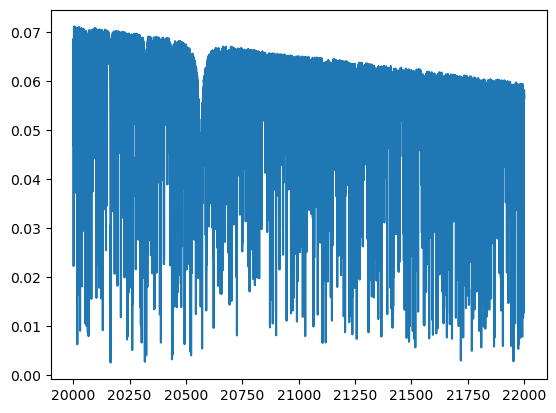

In [24]:
plt.plot(wn,out)

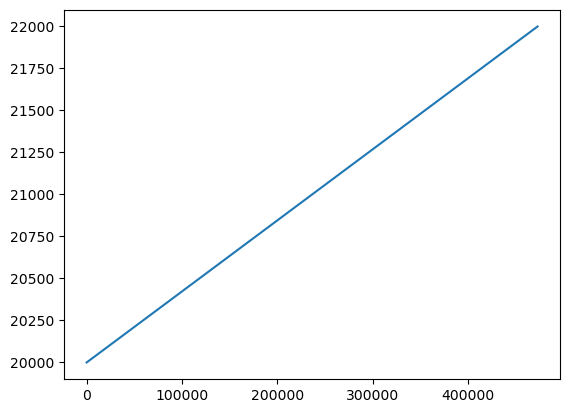

In [16]:
plt.plot(wn)

# Now try it for the 940nm channel

## the api

In [158]:
import tapefive.lab as tf

In [159]:
from tapefive import tools

In [376]:
reload(tf)
reload(tf.tape5parser)


<module 'tapefive.tape5parser' from '/home/hagen/prog/tapefive/tapefive/tape5parser.py'>

In [377]:
self = tf.Lblrtm()

In [378]:
print(self.tape5.tape5)

$ TAPE5 LBLRTM INPUT file generated by tapefive
 HI=1 F4=1 CN=5 AE=0 EM=0 SC=0 FI=0 PL=0 TS=0 AM=1 MG=0 LA=0 OD=0 XS=0   00   00          
 1.028E+04 1.101E+04 4.000E+00 0.000E+00 4.000E-02 3.600E+01 0.000E+00 0.000E+00    0      0.000E+00   39
P00000000000000000000000000000000000000
  5.0000000E-01  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00
  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00
  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00
  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00
  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00
    2    2   19    0    0                                                                 
 0.000E+00 1.000E+02 0.000E+00    

In [ ]:
 1.2345600E+02


In [343]:
m = 100
f"{m:10.3E}"

' 1.000E+02'

## by hand in the try 1

* cd lnfl
* ln -s ~/prog/AER_Line_File/AER_Line_File/line_file/aer_v_3.8.1 TAPE1  # link the line file to TAPE1
* create the TAPE5
* lnfl #simply run in the terminal, should work as executable is in ~/bin


### Translation of variables for 1.2 from what is in the Manual and what is in the Tape5 file

In [ ]:
Example tag	Manual var	What it controls (choices)
HI	IHIRAC	HIRAC/line shape selector (0,1,4,9; Voigt, NLTE, etc.). 
Atmospheric and Oceanic Science
F4	ILBLF4	LBLF4 extended line wings (0,1,2). 
Atmospheric and Oceanic Science
CN	ICNTNM	Continua/Rayleigh on/off & variants (0–6). 
Atmospheric and Oceanic Science
AE	IAERSL	Aerosols/cloud spectral absorber options (0,1,5,7,9). 
Atmospheric and Oceanic Science
EM	IEMIT	Output mode: optical depth / rad+trans / solar / AJ (0–3). 
Atmospheric and Oceanic Science
SC	ISCAN	Scan/interp/FFT (0–3). 
Atmospheric and Oceanic Science
FI	IFILTR	Filter function switch (0/1). 
Atmospheric and Oceanic Science
PL	IPLOT	PLTLBL (ASCII/plot) switch (0/1). 
Atmospheric and Oceanic Science
TS	ITEST	TEST flag (0/1). 
Atmospheric and Oceanic Science
AM	IATM	Use LBLATM (0/1). 
Atmospheric and Oceanic Science
MG	IMRG	Merge option (controls what’s written to MFILE/NFILE). 
Atmospheric and Oceanic Science
LA	ILAS	Laser options (not used in LBLRTM; keep 0). 
Atmospheric and Oceanic Science
OD	IOD	Optical-depth layering control (0–4). 
Atmospheric and Oceanic Science
XS	IXSECT	Cross-section usage (0/1 → triggers the 2.2/3.7 blocks). 
Atmospheric and Oceanic Science
—	MPTS, NPTS	How many values are printed per panel head/tail. 
Atmospheric and Oceanic Science

# SOME PLOTTING

In [283]:
import RC_utils as RC

In [286]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))

df_1 = df

In [287]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12_0.5')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))
df_05 = df

In [288]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12_0.5_tapefive_generated')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))
df_05_tf = df

In [293]:
%matplotlib inline

In [388]:
%matplotlib widget

In [402]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))
# df_05_tf = df

In [442]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE10')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))
# df_05_tf = df

<Axes: >

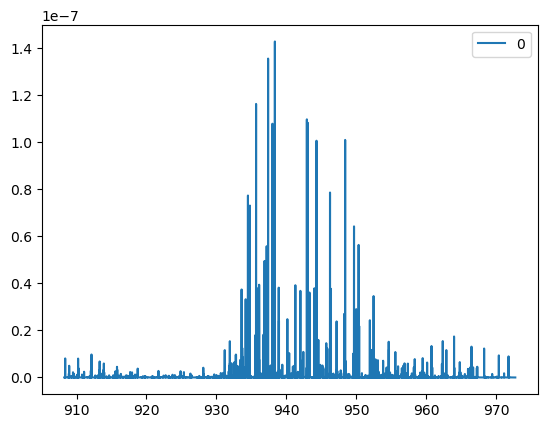

In [444]:
df.plot()

In [445]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12_ang_0')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))
df1 = df
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12_ang_60')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)
df =pd.DataFrame(out, index = tools.nm_to_inv_cm(wn))
df2 = df

<Axes: >

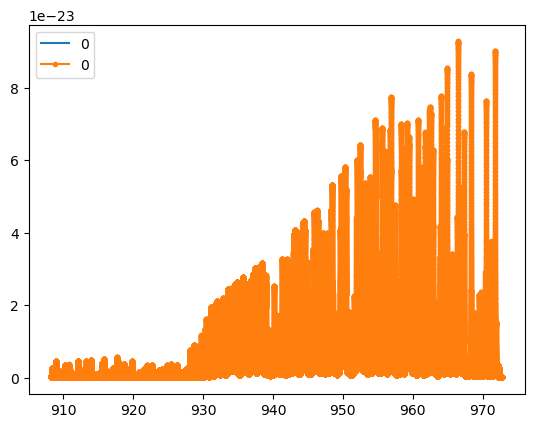

In [447]:
f,a = plt.subplots()
# df_05_tf.plot(ax = a, marker = '.')
df1.plot(ax = a)
df2.plot(ax = a, marker = '.')
# a.set_xlim(934.5, 935)


<Axes: >

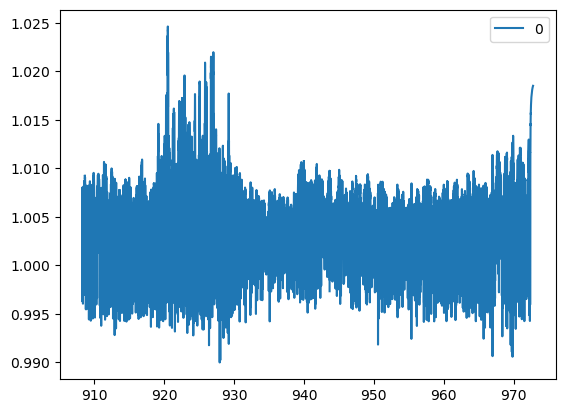

In [448]:
(df1/df2).plot()

In [430]:
r = df1.index/df2.index

In [428]:
steps1 = df1.index[:-1] - df1.index[1:]

In [426]:
steps2

Index([0.00023327232383962837, 0.00023327221185809321, 0.00023327210010393173,
        0.0002332719878950229,  0.0002332718763682351, 0.00023327176438669994,
       0.00023327165251885162,  0.0002332715406510033, 0.00023327142866946815,
       0.00023327131691530667,
       ...
        0.0002033652381214779,  0.0002033651468309472, 0.00020336505599516386,
       0.00020336496493200684,   0.000203364873755163,  0.0002033647828056928,
       0.00020336469162884896, 0.00020336460067937878,  0.0002033645093888481,
       0.00020336441843937791],
      dtype='float64', length=296124)

In [419]:
%matplotlib inline

In [435]:
np.unique(r.values)

array([1.])

(array([     0.,      0.,      0.,      0.,      0., 296125.,      0.,
             0.,      0.,      0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

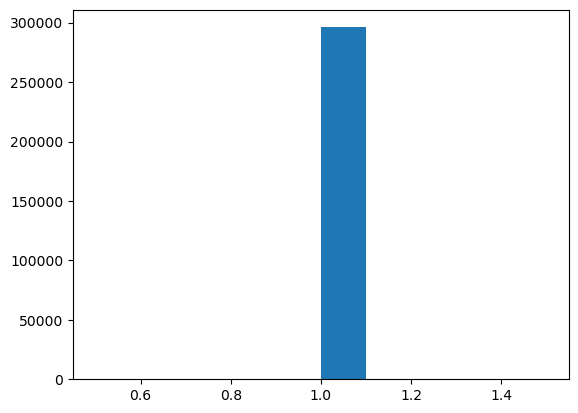

In [431]:
f,a = plt.subplots()
a.hist(r.values, bins = )

(array([32484., 31785., 31110., 30461., 29832., 29225., 28639., 28072.,
        27523., 26993.]),
 array([0.00020336, 0.00020636, 0.00020935, 0.00021234, 0.00021533,
        0.00021832, 0.00022131, 0.0002243 , 0.00022729, 0.00023028,
        0.00023327]),
 <BarContainer object of 10 artists>)

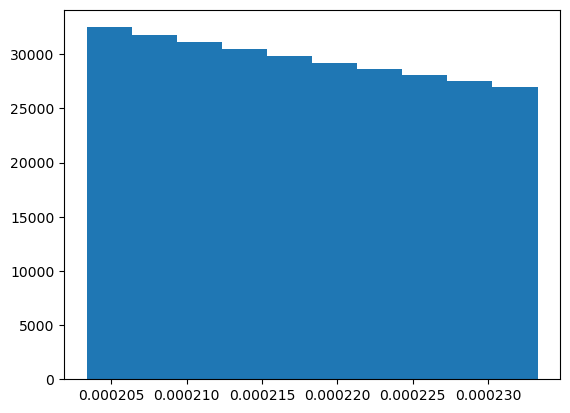

In [427]:
f,a = plt.subplots()
a.hist(steps.values)

In [399]:
df.shape

(74032, 1)

In [396]:
df.shape

(296125, 1)

<Axes: >

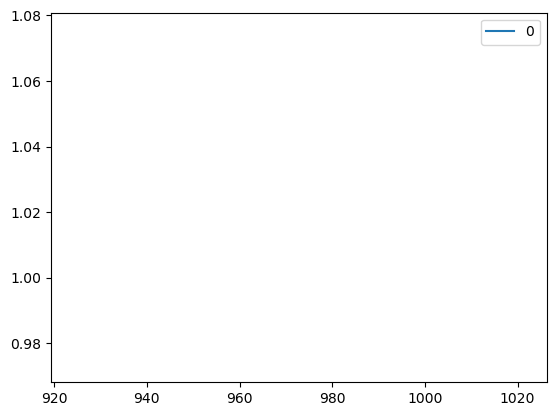

In [387]:
(df_05/df).plot()

<Axes: >

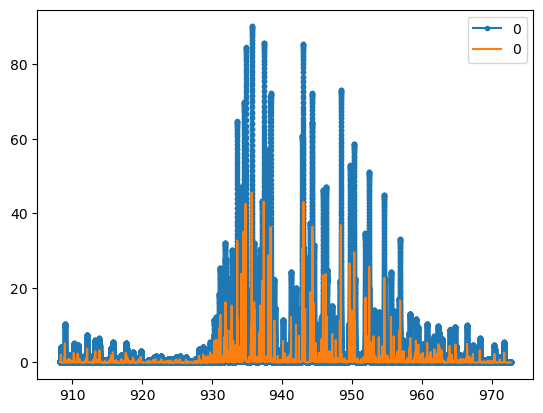

In [68]:
f,a = plt.subplots()
df_1.plot(ax = a, marker = '.')
df_05.plot(ax = a)

<Axes: >

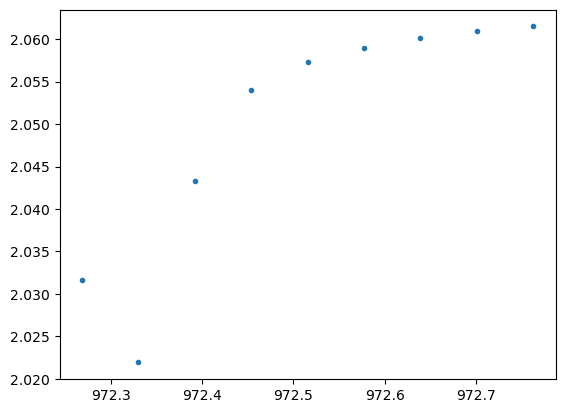

In [62]:
f,a = plt.subplots()
(df_1.iloc[:,0]/df_05.iloc[:,0]).plot(ax = a, marker = '.')

In [60]:
df_1.iloc[:,0]

972.762646    0.003754
972.762448    0.003754
972.762250    0.003754
972.762052    0.003755
972.761853    0.003755
                ...   
908.265882    0.221717
908.265709    0.222271
908.265536    0.222404
908.265363    0.222385
908.265191    0.222372
Name: 0, Length: 348645, dtype: float64

In [61]:
df_05.iloc[:,0]

972.762646    0.001821
972.762413    0.001821
972.762179    0.001821
972.761946    0.001821
972.761713    0.001822
                ...   
908.265986    0.109043
908.265782    0.109818
908.265579    0.110900
908.265376    0.110900
908.265172    0.110900
Name: 0, Length: 296125, dtype: float64

# Baustelle HIIIIIIIIIEEEEER, next: move from standard profile to real profile ... go from model 2 to model 0 and provide my own profile.

[link to chatgpt conversation](https://chatgpt.com/c/690a3f3f-bcac-8333-8117-9a3e368719c4)

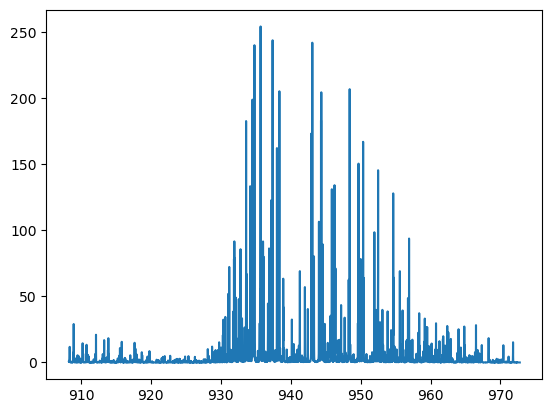

In [46]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)


wn.shape, out.shape

plt.plot(nm_to_inv_cm(wn),out)

In [47]:
df =pd.DataFrame(out, index = nm_to_inv_cm(wn))
df

,0
972.762646,0.011801
972.762478,0.011801
972.762309,0.011802
972.762141,0.011802
972.761973,0.011803
...,...
908.265653,0.661848
908.265507,0.662109
908.265360,0.661848
908.265213,0.661848


<Axes: >

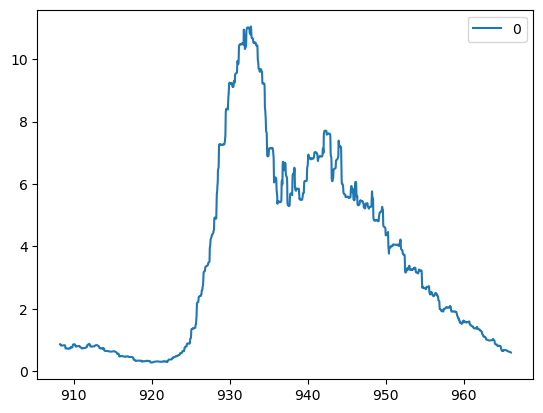

In [48]:
df.rolling(40000).mean().plot()

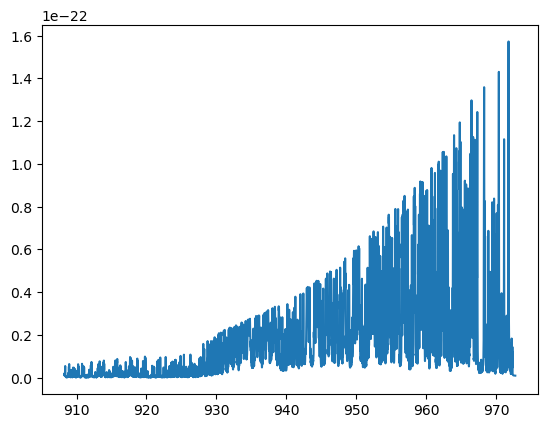

In [34]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)


wn.shape, out.shape

plt.plot(nm_to_inv_cm(wn),out)

In [35]:
df =pd.DataFrame(out, index = nm_to_inv_cm(wn))
df

,0
972.762646,9.223247e-25
972.762478,9.223463e-25
972.762309,9.223764e-25
972.762141,9.224102e-25
972.761973,9.224456e-25
...,...
908.265653,1.401731e-24
908.265507,1.408446e-24
908.265360,1.414858e-24
908.265213,1.419804e-24


<Axes: >

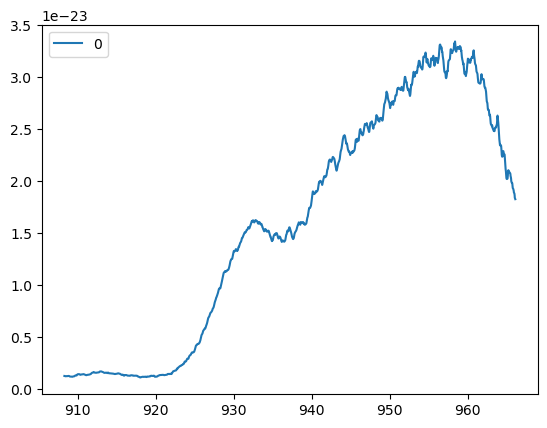

In [45]:
df.rolling(40000).mean().plot()

In [43]:
df

,0
972.762646,9.223247e-25
972.762478,9.223463e-25
972.762309,9.223764e-25
972.762141,9.224102e-25
972.761973,9.224456e-25
...,...
908.265653,1.401731e-24
908.265507,1.408446e-24
908.265360,1.414858e-24
908.265213,1.419804e-24


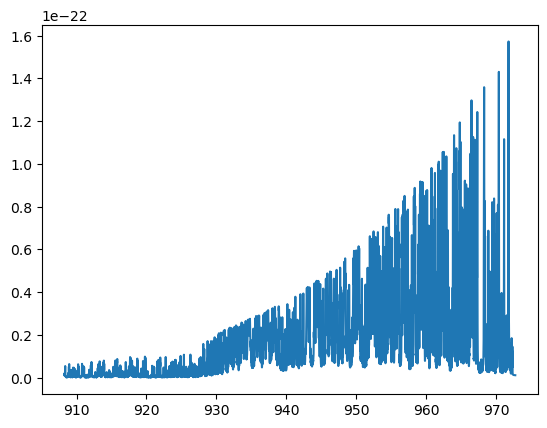

In [33]:
p2f = pl.Path('/home/hagen/projecte/mfrsr2pwt/try_1/lblrtm/TAPE12')
wn, out = RC.readBinary(p2f)   # returns wavenumbers and data (structure depends on file)


wn.shape, out.shape

plt.plot(nm_to_inv_cm(wn),out)

# Using Dockers (can't get it to work)

## Install Docker (Pop!_OS / Ubuntu)

In [ ]:
# bash
# Remove old packages (optional)
sudo apt-get remove docker docker-engine docker.io containerd runc

# Set up Docker's repo (official docs)
sudo apt-get update
sudo apt-get install -y ca-certificates curl gnupg
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
echo \
  "deb [arch=$(dpkg --print-architecture) signed-by=/etc/apt/keyrings/docker.gpg] \
  https://download.docker.com/linux/ubuntu $(. /etc/os-release && echo $UBUNTU_CODENAME) stable" \
| sudo tee /etc/apt/sources.list.d/docker.list >/dev/null

sudo apt-get update
sudo apt-get install -y docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin

# Let your user run docker without sudo (log out/in after this)
sudo usermod -aG docker "$USER"

# Quick test
docker run --rm hello-world

## Pull the official images

In [ ]:
# LBLRTM (from GitHub Container Registry)
docker pull ghcr.io/aer-rc/lblrtm/lblrtm:latest

# LNFL (published on Docker Hub by AER-RC)
docker pull aerradclim/lnfl:latest

## Get the AER line file (pairs with LBLRTM v12.17)

In [ ]:
# For the current LBLRTM (v12.17), AER pairs MT_CKD 4.3 with AER Line File v3.8.1. Use AER’s retriever to download it from Zenodo:

# Grab the retriever
git clone https://github.com/AER-RC/AER_Line_File
cd AER_Line_File

# follow instructions on gihub page

## Make a tiny working directory layout

In [ ]:
# mkdir -p work/line_file work/lnfl_in work/lnfl_out work/lbl_in work/lbl_out

## Prepare LNFL input for your band (build TAPE3)

In [ ]:
Your requested band: 910–970 nm ⇒ wavenumbers

910 nm → 10989.011 cm⁻¹

970 nm → 10309.278 cm⁻¹
(LNFL must extend ±25 cm⁻¹ beyond the LBLRTM range.) So for LNFL use vmin=10284.278 and vmax=11014.011. 
GitHub

Create work/lnfl_in/TAPE5 (LNFL’s input). Minimal 3-record example that selects only H₂O (molecule

#### below is the exact content of the file

In [ ]:
LNFL for H2O 910–970 nm (comment)
  10284.278  11014.011
1                                               LNOUT

## run the docker

In [ ]:
docker run --rm \
  -v "/home/hagen/projecte/mfrsr2pwt/work/lnfl_in/TAPE5":/LNFL/TAPE5:ro \
  -v "/home/hagen/projecte/mfrsr2pwt/work/lnfl_out":/LNFL/LNFL_Out \
  -v "/home/hagen/prog/AER_Line_File/AER_Line_File/line_file/aer_v_3.8.1":/LNFL/TAPE1:ro \
  aerradclim/lnfl:latest

The above command returned something that looked a little fishy, but according to chatgpt it went through fine

me:

Below is the comand and message of step 5. Did that work? (lblrtm) hagen@desktop21:~/projecte/mfrsr2pwt/work$ docker run --rm \ -v "/home/hagen/projecte/mfrsr2pwt/work/lnfl_in/TAPE5":/LNFL/TAPE5:ro \ -v "/home/hagen/projecte/mfrsr2pwt/work/lnfl_out":/LNFL/LNFL_Out \ -v "/home/hagen/prog/AER_Line_File/AER_Line_File/line_file/aer_v_3.8.1":/LNFL/TAPE1:ro \ aerradclim/lnfl:latest skipping over header records on TAPE1 TAPE1 IS AT A EOF STOP LINFIL COMPLETE mkdir: cannot create directory /LNFL/LNFL_Out': File exists mv: cannot stat TAPE7': No such file or directory

chatgpt:
Short answer: yes—that LNFL run finished successfully.

What your messages mean:

skipping over header records on TAPE1 → LNFL read the ASCII line file (good).

TAPE1 IS AT A EOF → it reached the end of that file normally (good).

STOP LINFIL COMPLETE → LNFL completed; this is the normal success stop. 
GitHub

mkdir: ... File exists → harmless; the container tried to make the output dir you already mounted.

mv: cannot stat 'TAPE7' → also harmless; TAPE7 is optional ASCII output only written if you ask for LNOUT in the LNFL TAPE5. You didn’t, so there’s no TAPE7 to move. LNFL’s real output is TAPE3.


## prepare LBLRTM

In [ ]:
cp work/lnfl_out/TAPE3 work/lbl_in/TAPE3

create a TAPE5 for LBLRTM, below is what I used

In [ ]:
$ H2O 910-970 nm | IEMIT=0, LBLATM MODEL=6, H2O only
    1    2    5    0    0    0    0    0    0    1    0    0    0    0    0    0
 1.028E+04 1.101E+04 4.000E+00 0.000E+00 4.000E-02 3.600E+01-1.000E+00-1.000E+00    0     2.000E-03      7
1000000                                
  1.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00  0.0000000E+00
        6    2    0    0    1    7  0  0     0.000   100.000     0.000               0.000
     0.000   100.000     0.000     0.000     0.000    0          0.000
         0.000     0.000     0.000     0.000     0.000
%


# Python script to generate LBLRTM TAPE5 files programatically

In [ ]:
# lblrtm_tape5_writer.py
from __future__ import annotations
import numpy as np
import xarray as xr
from typing import Iterable, Mapping, Optional

PRIMARY7 = ("H2O", "CO2", "O3", "N2O", "CO", "CH4", "O2")

def nm_to_cm1(nm: float) -> float:
    """Convert wavelength (nm) to wavenumber (cm^-1)."""
    # wavenumber [cm^-1] = 1 / (wavelength in cm)
    return 1e7 / float(nm)

def _species_flag_string(include: Iterable[str]) -> str:
    """Return the 7-character scaling flag string for Record 1.3a (PRIMARY7 order)."""
    s = set(x.upper() for x in include)
    return "".join("1" if g in s else "0" for g in PRIMARY7)

def _fmt_e(val: float, width: int = 11, prec: int = 3) -> str:
    """Fortran-like E-format with fixed width (pads left)."""
    return f"{val:.{prec}E}".rjust(width)

def write_tape5_from_xarray(
    ds: xr.Dataset,
    tape5_path: str,
    wl_nm: tuple[float, float] = (910.0, 970.0),
    angle_deg: float = 0.0,
    h1_km: float = 0.0,
    h2_km: float = 100.0,
    dvout: float = 0.002,
    include_species: Iterable[str] = ("H2O",),
    model: str = "US_STD",  # "US_STD" or "USER"
    write_tape1: bool = False,
    tape1_path: Optional[str] = None,
    var_map: Optional[Mapping[str, str]] = None,
) -> None:
    """
    Create LBLRTM TAPE5 from an xarray Dataset.
    If model='USER' and write_tape1=True, also writes TAPE1 with the profile.
    """
    model = model.upper()
    if model not in {"US_STD", "USER"}:
        raise ValueError("model must be 'US_STD' or 'USER'")

    # --- Spectral window (LBLRTM expects v1 < v2 in cm^-1) ---
    v_low = nm_to_cm1(max(wl_nm))   # longer λ -> lower ν~
    v_high = nm_to_cm1(min(wl_nm))  # shorter λ -> higher ν~
    v1, v2 = float(v_low), float(v_high)

    # --- Flags (Record 1.2) ---
    # IHIRAC=1 (line-by-line), ILBLF4=2 (LBLRTM v12), ICNTNM=5 (MT_CKD continua on, Rayleigh off),
    # IAERSL=0, IEMIT=0 (optical-depth only), ISCAT=0, ITRACE=0, IPATH=0 (standard),
    # IATM=1 (use LBLATM block), IMRG=1 (allow merging of panels), ILAS=0, IOD=0, IXSECT=0, (rest 0)
    rec12 = [1, 2, 5, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

    # --- Record 1.3: spectral & numerics ---
    # SAMPLE=4.0, DVSET=0.0, ALFAL0=4.0E-2, AVMASS=36.0, DPTMIN=-1, DPTFAC=-1, NPTS=0,
    # DVOUT (your sampling), NMOL=7 (primary 7 gases)
    sample = 4.0
    dvset = 0.0
    alfal0 = 4.0e-2
    avmass = 36.0
    dptmin = -1.0
    dptfac = -1.0
    npts = 0
    nmol = 7

    # --- Record 1.3a & 1.3b: species scaling flags & factors ---
    flags_7 = _species_flag_string(include_species)
    # scaling factors: 1.0 for included species, 0 for others (order PRIMARY7)
    scales = [1.0 if c == "1" else 0.0 for c in flags_7]

    # --- Record 3.1/3.2: LBLATM setup ---
    # MODEL: 6 (US Std) or 0 (USER profile via TAPE1)
    model_code = 6 if model == "US_STD" else 0
    itype = 2      # vertical/slant path by altitudes H1,H2 and ANGLE
    ibmax = 0
    noprt1 = 0     # print controls (keep defaults compact)
    noprt2 = 1
    nmol_3 = 7     # primary gases count in profile
    layht = 0
    mdef = 0
    # Geometry/limits (Record 3.2)
    H1, H2, ANGLE, RADIUS = float(h1_km), float(h2_km), float(angle_deg), 0.0

    # --- Build TAPE5 text ---
    lines = []
    lines.append(f"$ Auto-generated TAPE5 | window {wl_nm[0]}–{wl_nm[1]} nm | model={model} | species={','.join(include_species)}")

    # Record 1.2 (16 ints)
    lines.append("".join(f"{x:5d}" for x in rec12))

    # Record 1.3
    lines.append(
        f"{_fmt_e(v1)} {_fmt_e(v2)} {_fmt_e(sample)} {_fmt_e(dvset)} "
        f"{_fmt_e(alfal0)} {_fmt_e(avmass)} {_fmt_e(dptmin)} {_fmt_e(dptfac)}"
        f"{npts:5d} {_fmt_e(dvout)}{nmol:7d}"
    )

    # Record 1.3a (39 A1, we only need first 7 here)
    # LBLRTM reads free format here, so a simple string is fine.
    lines.append(flags_7.ljust(39))

    # Record 1.3b (scales for the 7 primaries)
    lines.append(" ".join(f"{s: .7E}" for s in scales))

    # Record 3.1 (LBLATM controls)
    # MODEL ITYPE IBMAX NOPR1 NOPR2 NMOL LAYHT MDEF  then (Record 3.2) H1 H2 ANGLE RADIUS
    lines.append(
        f"{model_code:9d}{itype:5d}{ibmax:5d}{noprt1:5d}{noprt2:5d}{nmol_3:5d}{layht:3d}{mdef:3d}"
        f"{H1:11.3f}{H2:11.3f}{ANGLE:11.3f}{RADIUS:19.3f}"
    )

    # Record 3.3A/B (layering tolerances) — keep defaults (zeros)
    lines.append(f"{0.0:10.3f}{H2:9.3f}{0.0:10.3f}{0.0:10.3f}{0.0:10.3f}{0:5d}{0.0:11.3f}")
    lines.append(f"{0.0:11.3f}{0.0:11.3f}{0.0:11.3f}{0.0:11.3f}{0.0:11.3f}")

    # Terminator
    lines.append("%")

    with open(tape5_path, "w", encoding="ascii") as f:
        f.write("\n".join(lines) + "\n")

    # Optionally write TAPE1 (only if USER model + write_tape1=True)
    if model == "USER" and write_tape1:
        if tape1_path is None:
            raise ValueError("Provide tape1_path when write_tape1=True and model='USER'.")
        _write_tape1_from_ds(ds, tape1_path, var_map=var_map)

def _write_tape1_from_ds(
    ds: xr.Dataset,
    tape1_path: str,
    var_map: Optional[Mapping[str, str]] = None,
    z_dim: str = "z",
) -> None:
    """
    Write a simple LBLRTM TAPE1 profile from ds (levels).
    Format: one header line, then columns:
      Z(km)  P(mb)  T(K)  VMR(H2O) CO2 O3 N2O CO CH4 O2
    """
    # Flexible variable names
    vm = {k.lower(): k for k in ds.data_vars}
    cm = {k.lower(): k for k in ds.coords}
    def pick(*names):
        for n in names:
            nm = (var_map or {}).get(n, n)
            for src in (vm, cm):
                if nm.lower() in src:
                    return ds[src[nm.lower()]]
        raise KeyError(f"Missing variable for {names} in dataset (or var_map).")

    z = pick("z", "alt")
    p = pick("p", "pressure")
    t = pick("t", "temperature")

    # Convert units
    # altitude → km
    z_vals = z.values.astype(float)
    if z.attrs.get("units", "").lower() in {"m", "meter", "meters"} or (z.max() > 2000):
        z_vals = z_vals / 1000.0
    # pressure → mb (hPa)
    p_vals = p.values.astype(float)
    if p.attrs.get("units", "").lower() in {"pa", "pascal", "pascals"} or (p.max() > 2000):
        p_vals = p_vals / 100.0  # Pa -> hPa/mb

    t_vals = t.values.astype(float)

    # Gas VMRs
    vmrs = []
    for g in PRIMARY7:
        # allow variants like 'q_H2O', 'vmr_h2o', etc.
        candidates = [g, g.lower(), f"vmr_{g.lower()}", f"q_{g.lower()}"]
        arr = None
        for cand in candidates:
            try:
                arr = pick(cand)
                break
            except KeyError:
                continue
        if arr is None:
            # if missing, fill zeros
            vmrs.append(np.zeros_like(t_vals, dtype=float))
        else:
            vmrs.append(np.asarray(arr.values, dtype=float))

    # Ensure 1D and same length
    n = len(z_vals)
    for arr in (p_vals, t_vals, *vmrs):
        if np.size(arr) != n:
            raise ValueError("All profile arrays must be 1-D with the same length along altitude.")

    # Sort by increasing altitude
    order = np.argsort(z_vals)
    z_vals = z_vals[order]
    p_vals = p_vals[order]
    t_vals = t_vals[order]
    vmrs = [v[order] for v in vmrs]

    # Write file
    with open(tape1_path, "w", encoding="ascii") as f:
        f.write("User-defined profile from xarray (Z km, P mb, T K, VMRs)\n")
        for i in range(n):
            cols = [
                f"{z_vals[i]:10.3f}",
                f"{p_vals[i]:10.3f}",
                f"{t_vals[i]:10.3f}",
                *[f"{vmrs[j][i]:12.6E}" for j in range(7)],
            ]
            f.write(" ".join(cols) + "\n")


In [ ]:
A) Quick run with the built-in US Standard (no profile file needed)

In [ ]:
import xarray as xr
from lblrtm_tape5_writer import write_tape5_from_xarray

ds = xr.Dataset()  # we just need something to pass; values come from args here
write_tape5_from_xarray(
    ds,
    tape5_path="TAPE5",
    wl_nm=(910.0, 970.0),
    angle_deg=0.0,      # zenith
    h1_km=0.0, h2_km=100.0,
    dvout=0.002,
    include_species=("H2O",),  # H2O only
    model="US_STD",            # use LBLRTM's US Standard
)


In [ ]:
B) Use your own vertical profile (writes both TAPE5 and TAPE1)

In [ ]:
import numpy as np, xarray as xr
from lblrtm_tape5_writer import write_tape5_from_xarray, PRIMARY7

z = np.linspace(0, 30, 61)                     # km
p = 1013.25 * np.exp(-z/7.2)                   # mb-ish (we’ll convert if Pa)
t = 288.15 - 6.5*z                             # K (toy lapse)
h2o = 0.01*np.exp(-z/2.0)                      # toy VMR
co2 = np.full_like(z, 4.20e-4)                 # 420 ppm
o3  = 1e-7*np.exp(-(z-20)**2/18)               # toy ozone peak
n2o = np.full_like(z, 3.3e-7)
co  = np.full_like(z, 1.0e-7)
ch4 = np.full_like(z, 1.9e-6)
o2  = np.full_like(z, 0.2095)

ds = xr.Dataset(
    data_vars=dict(
        p=("z", p*100.0),                 # Pa (will be converted)
        t=("z", t),
        H2O=("z", h2o),
        CO2=("z", co2),
        O3=("z",  o3),
        N2O=("z", n2o),
        CO=("z",  co),
        CH4=("z", ch4),
        O2=("z",  o2),
    ),
    coords=dict(z=("z", z)),
)
write_tape5_from_xarray(
    ds,
    tape5_path="TAPE5",
    wl_nm=(910.0, 970.0),
    angle_deg=0.0,
    h1_km=0.0, h2_km=30.0,
    dvout=0.002,
    include_species=("H2O","CO2","O3","N2O","CO","CH4","O2"),
    model="USER",
    write_tape1=True,
    tape1_path="TAPE1",
)


## Full chatgpt message

In [ ]:
Here’s a drop-in Python helper that writes a valid LBLRTM TAPE5 from an xarray.Dataset. It supports two modes:

model='US_STD' (default): uses LBLRTM’s built-in US Standard Atmosphere (no custom profile needed).

model='USER': sets MODEL=0 (user-defined). In this mode LBLRTM expects your vertical profile in TAPE1. The function can optionally write a matching TAPE1 from your dataset (set write_tape1=True).

It also lets you choose species to include (default: H₂O only), geometry (H1/H2/ANGLE), spectral window in nm (auto-converted to cm⁻¹), and sampling (dvout).

Dataset expectations (when model='USER'):
ds must provide level-wise profiles along a dimension (default "z"):

altitude: z (km) or alt (m or km)

pressure: p (Pa or hPa/mb) or pressure

temperature: t (K) or temperature

gas VMRs (mole fraction) named (case-insensitive) H2O, CO2, O3, N2O, CO, CH4, O2.
You can remap names via var_map.

# lblrtm_tape5_writer.py
from __future__ import annotations
import numpy as np
import xarray as xr
from typing import Iterable, Mapping, Optional

PRIMARY7 = ("H2O", "CO2", "O3", "N2O", "CO", "CH4", "O2")

def nm_to_cm1(nm: float) -> float:
    """Convert wavelength (nm) to wavenumber (cm^-1)."""
    # wavenumber [cm^-1] = 1 / (wavelength in cm)
    return 1e7 / float(nm)

def _species_flag_string(include: Iterable[str]) -> str:
    """Return the 7-character scaling flag string for Record 1.3a (PRIMARY7 order)."""
    s = set(x.upper() for x in include)
    return "".join("1" if g in s else "0" for g in PRIMARY7)

def _fmt_e(val: float, width: int = 11, prec: int = 3) -> str:
    """Fortran-like E-format with fixed width (pads left)."""
    return f"{val:.{prec}E}".rjust(width)

def write_tape5_from_xarray(
    ds: xr.Dataset,
    tape5_path: str,
    wl_nm: tuple[float, float] = (910.0, 970.0),
    angle_deg: float = 0.0,
    h1_km: float = 0.0,
    h2_km: float = 100.0,
    dvout: float = 0.002,
    include_species: Iterable[str] = ("H2O",),
    model: str = "US_STD",  # "US_STD" or "USER"
    write_tape1: bool = False,
    tape1_path: Optional[str] = None,
    var_map: Optional[Mapping[str, str]] = None,
) -> None:
    """
    Create LBLRTM TAPE5 from an xarray Dataset.
    If model='USER' and write_tape1=True, also writes TAPE1 with the profile.
    """
    model = model.upper()
    if model not in {"US_STD", "USER"}:
        raise ValueError("model must be 'US_STD' or 'USER'")

    # --- Spectral window (LBLRTM expects v1 < v2 in cm^-1) ---
    v_low = nm_to_cm1(max(wl_nm))   # longer λ -> lower ν~
    v_high = nm_to_cm1(min(wl_nm))  # shorter λ -> higher ν~
    v1, v2 = float(v_low), float(v_high)

    # --- Flags (Record 1.2) ---
    # IHIRAC=1 (line-by-line), ILBLF4=2 (LBLRTM v12), ICNTNM=5 (MT_CKD continua on, Rayleigh off),
    # IAERSL=0, IEMIT=0 (optical-depth only), ISCAT=0, ITRACE=0, IPATH=0 (standard),
    # IATM=1 (use LBLATM block), IMRG=1 (allow merging of panels), ILAS=0, IOD=0, IXSECT=0, (rest 0)
    rec12 = [1, 2, 5, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

    # --- Record 1.3: spectral & numerics ---
    # SAMPLE=4.0, DVSET=0.0, ALFAL0=4.0E-2, AVMASS=36.0, DPTMIN=-1, DPTFAC=-1, NPTS=0,
    # DVOUT (your sampling), NMOL=7 (primary 7 gases)
    sample = 4.0
    dvset = 0.0
    alfal0 = 4.0e-2
    avmass = 36.0
    dptmin = -1.0
    dptfac = -1.0
    npts = 0
    nmol = 7

    # --- Record 1.3a & 1.3b: species scaling flags & factors ---
    flags_7 = _species_flag_string(include_species)
    # scaling factors: 1.0 for included species, 0 for others (order PRIMARY7)
    scales = [1.0 if c == "1" else 0.0 for c in flags_7]

    # --- Record 3.1/3.2: LBLATM setup ---
    # MODEL: 6 (US Std) or 0 (USER profile via TAPE1)
    model_code = 6 if model == "US_STD" else 0
    itype = 2      # vertical/slant path by altitudes H1,H2 and ANGLE
    ibmax = 0
    noprt1 = 0     # print controls (keep defaults compact)
    noprt2 = 1
    nmol_3 = 7     # primary gases count in profile
    layht = 0
    mdef = 0
    # Geometry/limits (Record 3.2)
    H1, H2, ANGLE, RADIUS = float(h1_km), float(h2_km), float(angle_deg), 0.0

    # --- Build TAPE5 text ---
    lines = []
    lines.append(f"$ Auto-generated TAPE5 | window {wl_nm[0]}–{wl_nm[1]} nm | model={model} | species={','.join(include_species)}")

    # Record 1.2 (16 ints)
    lines.append("".join(f"{x:5d}" for x in rec12))

    # Record 1.3
    lines.append(
        f"{_fmt_e(v1)} {_fmt_e(v2)} {_fmt_e(sample)} {_fmt_e(dvset)} "
        f"{_fmt_e(alfal0)} {_fmt_e(avmass)} {_fmt_e(dptmin)} {_fmt_e(dptfac)}"
        f"{npts:5d} {_fmt_e(dvout)}{nmol:7d}"
    )

    # Record 1.3a (39 A1, we only need first 7 here)
    # LBLRTM reads free format here, so a simple string is fine.
    lines.append(flags_7.ljust(39))

    # Record 1.3b (scales for the 7 primaries)
    lines.append(" ".join(f"{s: .7E}" for s in scales))

    # Record 3.1 (LBLATM controls)
    # MODEL ITYPE IBMAX NOPR1 NOPR2 NMOL LAYHT MDEF  then (Record 3.2) H1 H2 ANGLE RADIUS
    lines.append(
        f"{model_code:9d}{itype:5d}{ibmax:5d}{noprt1:5d}{noprt2:5d}{nmol_3:5d}{layht:3d}{mdef:3d}"
        f"{H1:11.3f}{H2:11.3f}{ANGLE:11.3f}{RADIUS:19.3f}"
    )

    # Record 3.3A/B (layering tolerances) — keep defaults (zeros)
    lines.append(f"{0.0:10.3f}{H2:9.3f}{0.0:10.3f}{0.0:10.3f}{0.0:10.3f}{0:5d}{0.0:11.3f}")
    lines.append(f"{0.0:11.3f}{0.0:11.3f}{0.0:11.3f}{0.0:11.3f}{0.0:11.3f}")

    # Terminator
    lines.append("%")

    with open(tape5_path, "w", encoding="ascii") as f:
        f.write("\n".join(lines) + "\n")

    # Optionally write TAPE1 (only if USER model + write_tape1=True)
    if model == "USER" and write_tape1:
        if tape1_path is None:
            raise ValueError("Provide tape1_path when write_tape1=True and model='USER'.")
        _write_tape1_from_ds(ds, tape1_path, var_map=var_map)

def _write_tape1_from_ds(
    ds: xr.Dataset,
    tape1_path: str,
    var_map: Optional[Mapping[str, str]] = None,
    z_dim: str = "z",
) -> None:
    """
    Write a simple LBLRTM TAPE1 profile from ds (levels).
    Format: one header line, then columns:
      Z(km)  P(mb)  T(K)  VMR(H2O) CO2 O3 N2O CO CH4 O2
    """
    # Flexible variable names
    vm = {k.lower(): k for k in ds.data_vars}
    cm = {k.lower(): k for k in ds.coords}
    def pick(*names):
        for n in names:
            nm = (var_map or {}).get(n, n)
            for src in (vm, cm):
                if nm.lower() in src:
                    return ds[src[nm.lower()]]
        raise KeyError(f"Missing variable for {names} in dataset (or var_map).")

    z = pick("z", "alt")
    p = pick("p", "pressure")
    t = pick("t", "temperature")

    # Convert units
    # altitude → km
    z_vals = z.values.astype(float)
    if z.attrs.get("units", "").lower() in {"m", "meter", "meters"} or (z.max() > 2000):
        z_vals = z_vals / 1000.0
    # pressure → mb (hPa)
    p_vals = p.values.astype(float)
    if p.attrs.get("units", "").lower() in {"pa", "pascal", "pascals"} or (p.max() > 2000):
        p_vals = p_vals / 100.0  # Pa -> hPa/mb

    t_vals = t.values.astype(float)

    # Gas VMRs
    vmrs = []
    for g in PRIMARY7:
        # allow variants like 'q_H2O', 'vmr_h2o', etc.
        candidates = [g, g.lower(), f"vmr_{g.lower()}", f"q_{g.lower()}"]
        arr = None
        for cand in candidates:
            try:
                arr = pick(cand)
                break
            except KeyError:
                continue
        if arr is None:
            # if missing, fill zeros
            vmrs.append(np.zeros_like(t_vals, dtype=float))
        else:
            vmrs.append(np.asarray(arr.values, dtype=float))

    # Ensure 1D and same length
    n = len(z_vals)
    for arr in (p_vals, t_vals, *vmrs):
        if np.size(arr) != n:
            raise ValueError("All profile arrays must be 1-D with the same length along altitude.")

    # Sort by increasing altitude
    order = np.argsort(z_vals)
    z_vals = z_vals[order]
    p_vals = p_vals[order]
    t_vals = t_vals[order]
    vmrs = [v[order] for v in vmrs]

    # Write file
    with open(tape1_path, "w", encoding="ascii") as f:
        f.write("User-defined profile from xarray (Z km, P mb, T K, VMRs)\n")
        for i in range(n):
            cols = [
                f"{z_vals[i]:10.3f}",
                f"{p_vals[i]:10.3f}",
                f"{t_vals[i]:10.3f}",
                *[f"{vmrs[j][i]:12.6E}" for j in range(7)],
            ]
            f.write(" ".join(cols) + "\n")

How to use it (typical cases)
A) Quick run with the built-in US Standard (no profile file needed)
import xarray as xr
from lblrtm_tape5_writer import write_tape5_from_xarray

ds = xr.Dataset()  # we just need something to pass; values come from args here
write_tape5_from_xarray(
    ds,
    tape5_path="TAPE5",
    wl_nm=(910.0, 970.0),
    angle_deg=0.0,      # zenith
    h1_km=0.0, h2_km=100.0,
    dvout=0.002,
    include_species=("H2O",),  # H2O only
    model="US_STD",            # use LBLRTM's US Standard
)


Now put your TAPE3 (from LNFL) next to this TAPE5 and run the LBLRTM Docker container.

B) Use your own vertical profile (writes both TAPE5 and TAPE1)
import numpy as np, xarray as xr
from lblrtm_tape5_writer import write_tape5_from_xarray, PRIMARY7

z = np.linspace(0, 30, 61)                     # km
p = 1013.25 * np.exp(-z/7.2)                   # mb-ish (we’ll convert if Pa)
t = 288.15 - 6.5*z                             # K (toy lapse)
h2o = 0.01*np.exp(-z/2.0)                      # toy VMR
co2 = np.full_like(z, 4.20e-4)                 # 420 ppm
o3  = 1e-7*np.exp(-(z-20)**2/18)               # toy ozone peak
n2o = np.full_like(z, 3.3e-7)
co  = np.full_like(z, 1.0e-7)
ch4 = np.full_like(z, 1.9e-6)
o2  = np.full_like(z, 0.2095)

ds = xr.Dataset(
    data_vars=dict(
        p=("z", p*100.0),                 # Pa (will be converted)
        t=("z", t),
        H2O=("z", h2o),
        CO2=("z", co2),
        O3=("z",  o3),
        N2O=("z", n2o),
        CO=("z",  co),
        CH4=("z", ch4),
        O2=("z",  o2),
    ),
    coords=dict(z=("z", z)),
)
write_tape5_from_xarray(
    ds,
    tape5_path="TAPE5",
    wl_nm=(910.0, 970.0),
    angle_deg=0.0,
    h1_km=0.0, h2_km=30.0,
    dvout=0.002,
    include_species=("H2O","CO2","O3","N2O","CO","CH4","O2"),
    model="USER",
    write_tape1=True,
    tape1_path="TAPE1",
)

Notes & tips

For LNFL you still need a separate TAPE5 (different format) and the AER ASCII line list to build TAPE3. The LBLRTM TAPE5 above should not include the ±25 cm⁻¹ padding—that padding is only for the LNFL window.

The binary TAPE12 output can be parsed in Python (e.g., using AER’s RC_utils.py), or you can request ASCII output via PLTLBL controls in more advanced TAPE5s if you prefer plain text parsing.

If you want Rayleigh or different continua flags, you can tweak rec12 (Record 1.2) inside the function—ping me and I’ll expose them as parameters.

If you want, I can also add a tiny function that writes the LNFL TAPE5 for this same 910–970 nm case (H₂O only, with the correct ±25 cm⁻¹ buffer) so you can fully automate: write LNFL TAPE5 → run LNFL (Docker) → write LBLRTM TAPE5/TAPE1 → run LBLRTM (Docker).

# using conda environment --- work needed

I did not get this to work, but it might work after aditing the make.commons file described above!!

In [1]:
# new env
mamba create -n lblrtm -c conda-forge gfortran_linux-64 make libnetcdf netcdf-fortran git
conda activate lblrtm

#make available to notebook
mamba install ipykernel
python -m ipykernel install --user --name lblrtm

SyntaxError: invalid syntax (454345258.py, line 2)

In [ ]:
# Clone the official repos (use the release tags):
git clone --recursive https://github.com/AER-RC/LNFL.git
git -C LNFL checkout tags/v3.2

git clone --recursive https://github.com/AER-RC/LBLRTM.git
git -C LBLRTM checkout tags/v12.17